In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

In [2]:
# ====== 读取并过滤数据 ======
model_list = ["af3", "afm", "chai", "helix", "rfaa", "native"]
results_dir = Path("../results")
summary_path = "/data/home/silong/paper/PepPCBench/results/job_summary.csv"

# 加载 job_summary.csv
df_new = pd.read_csv(summary_path)

# 加载每个模型的数据，过滤掉无效 job
df_dict = {}
for model_name in model_list:
    df_path = results_dir / f"molprobity_{model_name}.csv"
    df = pd.read_csv(df_path)
    df = df[df["job_name"].isin(df_new["job_name"])]
    df_dict[model_name] = df

# 分离 native
df_native = df_dict["native"]
df_dict = {k: v for k, v in df_dict.items() if k != "native"}

In [11]:
def plot_dual_clashscore_distributions(
    df_dict,
    df_native,
    model_list,
    clashscore_cutoff=50,
    left_cutoff=-10,
    score_name="Clashscore",
    figsize=(6, 4),
    dpi=600,
    show_mean=True,
    show_legend=True
):
    complex_key = f"complex_{score_name}"
    peptide_key = f"peptide_{score_name}"
    colors = sns.color_palette("Set2", len(model_list) + 1)

    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    x_grid = np.linspace(left_cutoff, clashscore_cutoff, 512)

    def plot_kde(values_raw, color, label, invert=False, lw=1.2):
        # 清洗数据
        values = values_raw.replace([np.inf, -np.inf], np.nan).dropna()
        values = values[values < clashscore_cutoff]
        if len(values) < 2:
            return

        # KDE 密度估计
        kde = gaussian_kde(values)
        y_vals = kde(x_grid)
        y_vals = -y_vals if invert else y_vals

        # KDE 曲线
        ax.plot(x_grid, y_vals, color=color, label=label, linewidth=lw)

        # 均值线（仅显示对应半边）
        if show_mean:
            mean_val = values.mean()
            y_max = np.abs(y_vals).max()
            # ax.plot(
            #     [mean_val, mean_val],
            #     [0, -y_max if invert else y_max],
            #     color=color,
            #     linewidth=2,
            #     linestyle="-",
            #     alpha=0.7
            # )
            print(mean_val, y_max)

    # 各模型
    for i, model in enumerate(model_list):
        df = df_dict.get(model, pd.DataFrame())
        if df.empty:
            continue
        plot_kde(df[complex_key], colors[i], f"{model.upper()} (C)", invert=False)
        plot_kde(df[peptide_key], colors[i], f"{model.upper()} (P)", invert=True)

    # Native
    if not df_native.empty:
        plot_kde(df_native[complex_key], colors[-1], "Native (C)", invert=False, lw=1.5)
        plot_kde(df_native[peptide_key], colors[-1], "Native (P)", invert=True, lw=1.5)

    # 辅助线
    ax.axvline(clashscore_cutoff, color="gray", linestyle="--", linewidth=1, alpha=0.5)
    ax.axhline(0, color="black", linewidth=0.8)

    # 坐标轴与样式
    ax.set_xlabel("Clash Score", fontsize=11)
    ax.set_ylabel("Density (+ Complex / - Peptide)", fontsize=11)
    ax.set_xlim(left_cutoff, clashscore_cutoff)
    ax.set_xticks(np.arange(left_cutoff, clashscore_cutoff + 1, 10))

    # 图例
    if show_legend:
        ax.legend(loc="upper right", fontsize=9, title="Models", title_fontsize=10)

    # # 图像边框
    # fig.patch.set_edgecolor('black')
    # fig.patch.set_linewidth(0.5)

    plt.tight_layout()
    plt.show()

7.096421749845964 0.13772827267590404
4.278407921409637 0.1810265371881954
21.429903188115507 0.07400373150466272
10.909087904824851 0.07043463848054757
12.751866810544163 0.07237272245036039
5.73242724555608 0.14149881046091664
10.91281170076726 0.08841752431114515
5.642772448498191 0.14359743799161323
38.81092974115161 0.05113266180283554
22.771185914034177 0.023959949434165823
4.488527131782946 0.15969515733612216
2.8168871595330742 0.15361578683246777


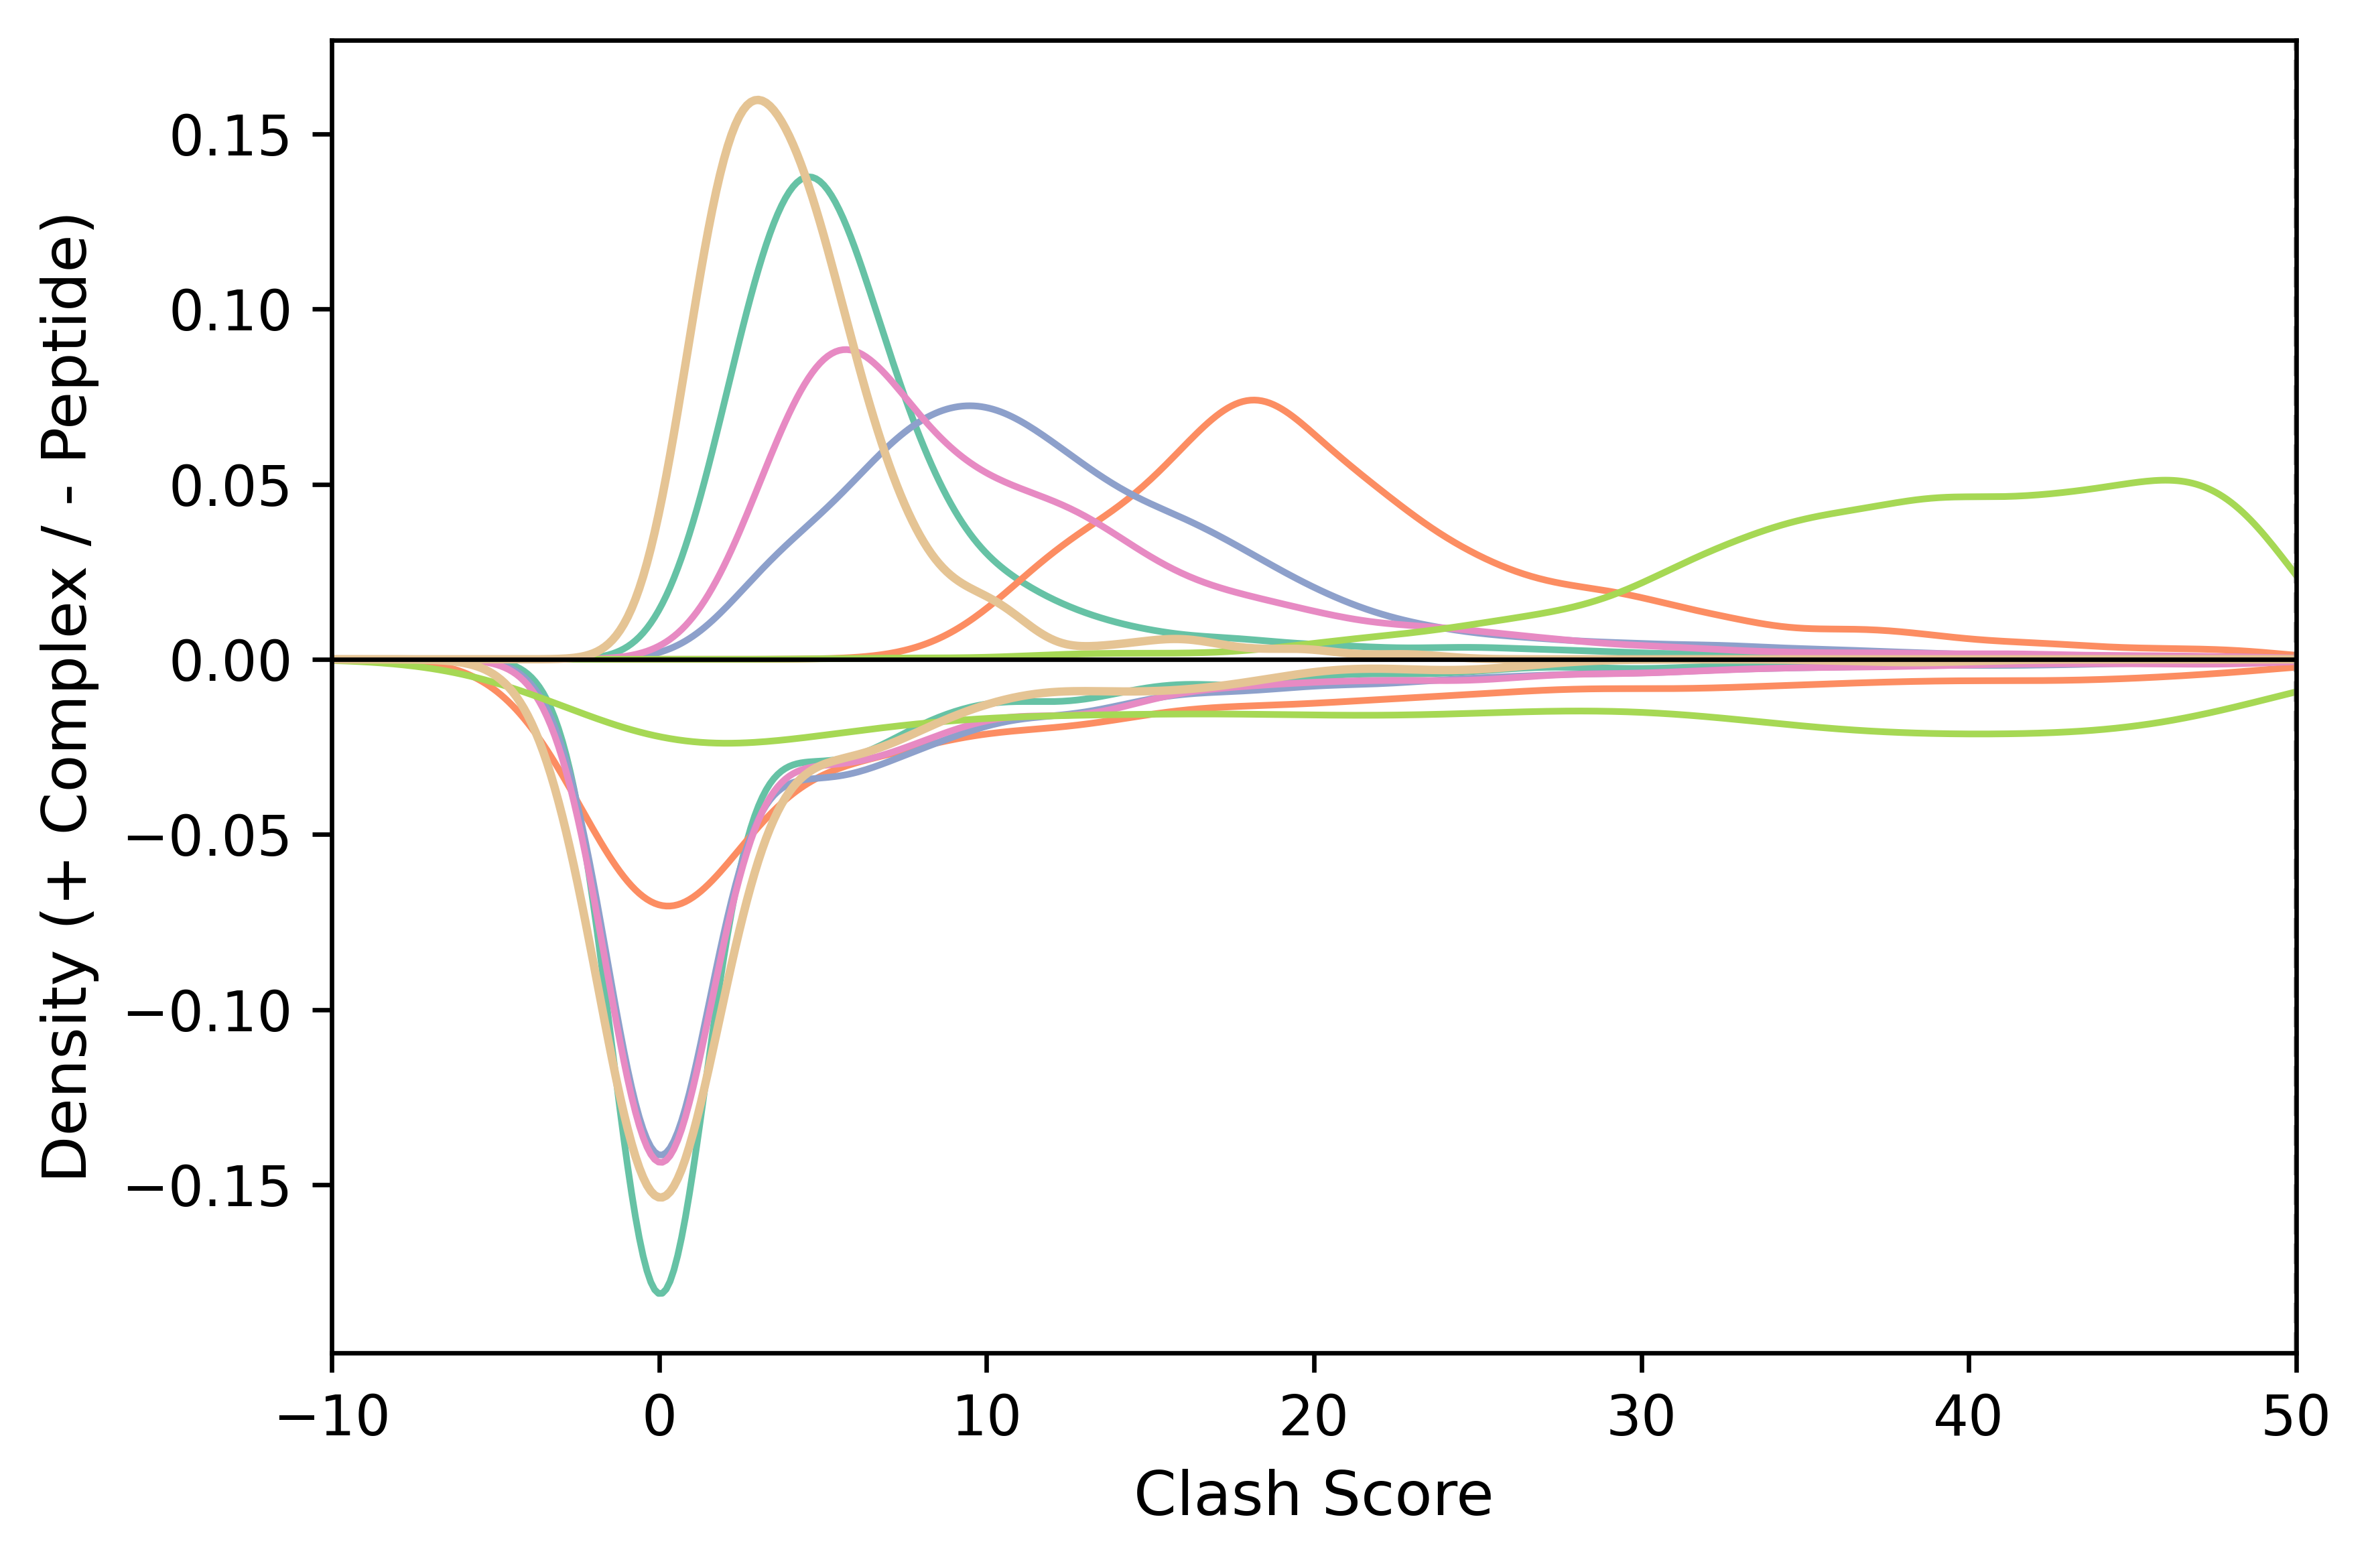

In [12]:
plot_dual_clashscore_distributions(
    df_dict=df_dict,
    df_native=df_native,
    model_list=model_list,
    show_mean=True,
    show_legend=False
)

In [5]:
def plot_dual_clashscore_distributions(
    df_dict,
    df_native,
    model_list,
    clashscore_cutoff=50,
    left_cutoff=-10,
    score_name="Clashscore",
    figsize=(6, 4),
    dpi=600,
    show_mean=True,
    show_legend=True
):
    complex_key = f"complex_{score_name}"
    peptide_key = f"peptide_{score_name}"
    colors = sns.color_palette("Set2", len(model_list) + 1)

    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    x_grid = np.linspace(left_cutoff, clashscore_cutoff, 512)

    def plot_kde(values_raw, color, label, invert=False, lw=1.2):
        # 清洗数据
        values = values_raw.replace([np.inf, -np.inf], np.nan).dropna()
        values = values[values < clashscore_cutoff]
        if len(values) < 2:
            return

        # KDE 密度估计
        kde = gaussian_kde(values)
        y_vals = kde(x_grid)
        y_vals = -y_vals if invert else y_vals

        # KDE 曲线
        ax.plot(x_grid, y_vals, color=color, label=label, linewidth=lw)

        # 均值线（仅显示对应半边）
        if show_mean:
            mean_val = values.mean()
            y_max = np.abs(y_vals).max()
            # ax.plot(
            #     [mean_val, mean_val],
            #     [0, -y_max if invert else y_max],
            #     color=color,
            #     linewidth=2,
            #     linestyle="-",
            #     alpha=0.7
            # )
            print(mean_val, y_max)

    # 各模型
    for i, model in enumerate(model_list):
        df = df_dict.get(model, pd.DataFrame())
        if df.empty:
            continue
        plot_kde(df[complex_key], colors[i], f"{model.upper()} (C)", invert=False)
        plot_kde(df[peptide_key], colors[i], f"{model.upper()} (P)", invert=True)

    # Native
    if not df_native.empty:
        plot_kde(df_native[complex_key], colors[-1], "Native (C)", invert=False, lw=1.5)
        plot_kde(df_native[peptide_key], colors[-1], "Native (P)", invert=True, lw=1.5)

    # 辅助线
    ax.axvline(clashscore_cutoff, color="gray", linestyle="--", linewidth=1, alpha=0.5)
    ax.axhline(0, color="black", linewidth=0.8)

    # 坐标轴与样式
    ax.set_xlabel("MolProbity Score", fontsize=11)
    ax.set_ylabel("Density (+ Complex / - Peptide)", fontsize=11)
    ax.set_xlim(left_cutoff, clashscore_cutoff)
    ax.set_xticks(np.arange(left_cutoff, clashscore_cutoff + 1, 1))

    # 图例
    if show_legend:
        ax.legend(loc="upper right", fontsize=9, title="Models", title_fontsize=10)

    # # 图像边框
    # fig.patch.set_edgecolor('black')
    # fig.patch.set_linewidth(0.5)

    plt.tight_layout()
    plt.show()

1.5465153846153847 1.093657800401526
1.2574076923076922 1.0991625164211978
2.374853846153846 0.7256510044503285
2.5766923076923076 0.24821074542426388
1.5872718879827665 1.8525498398429487
1.0715879366056316 1.752799016647429
1.5411015384615385 1.3512016818090924
1.0893015384615385 1.6668188201340455
2.8542242606357737 0.8206219879100006
3.437349359481259 0.44187188815612055
1.4830620155038758 0.9483622545235394
1.218372093023256 0.6613195756691098


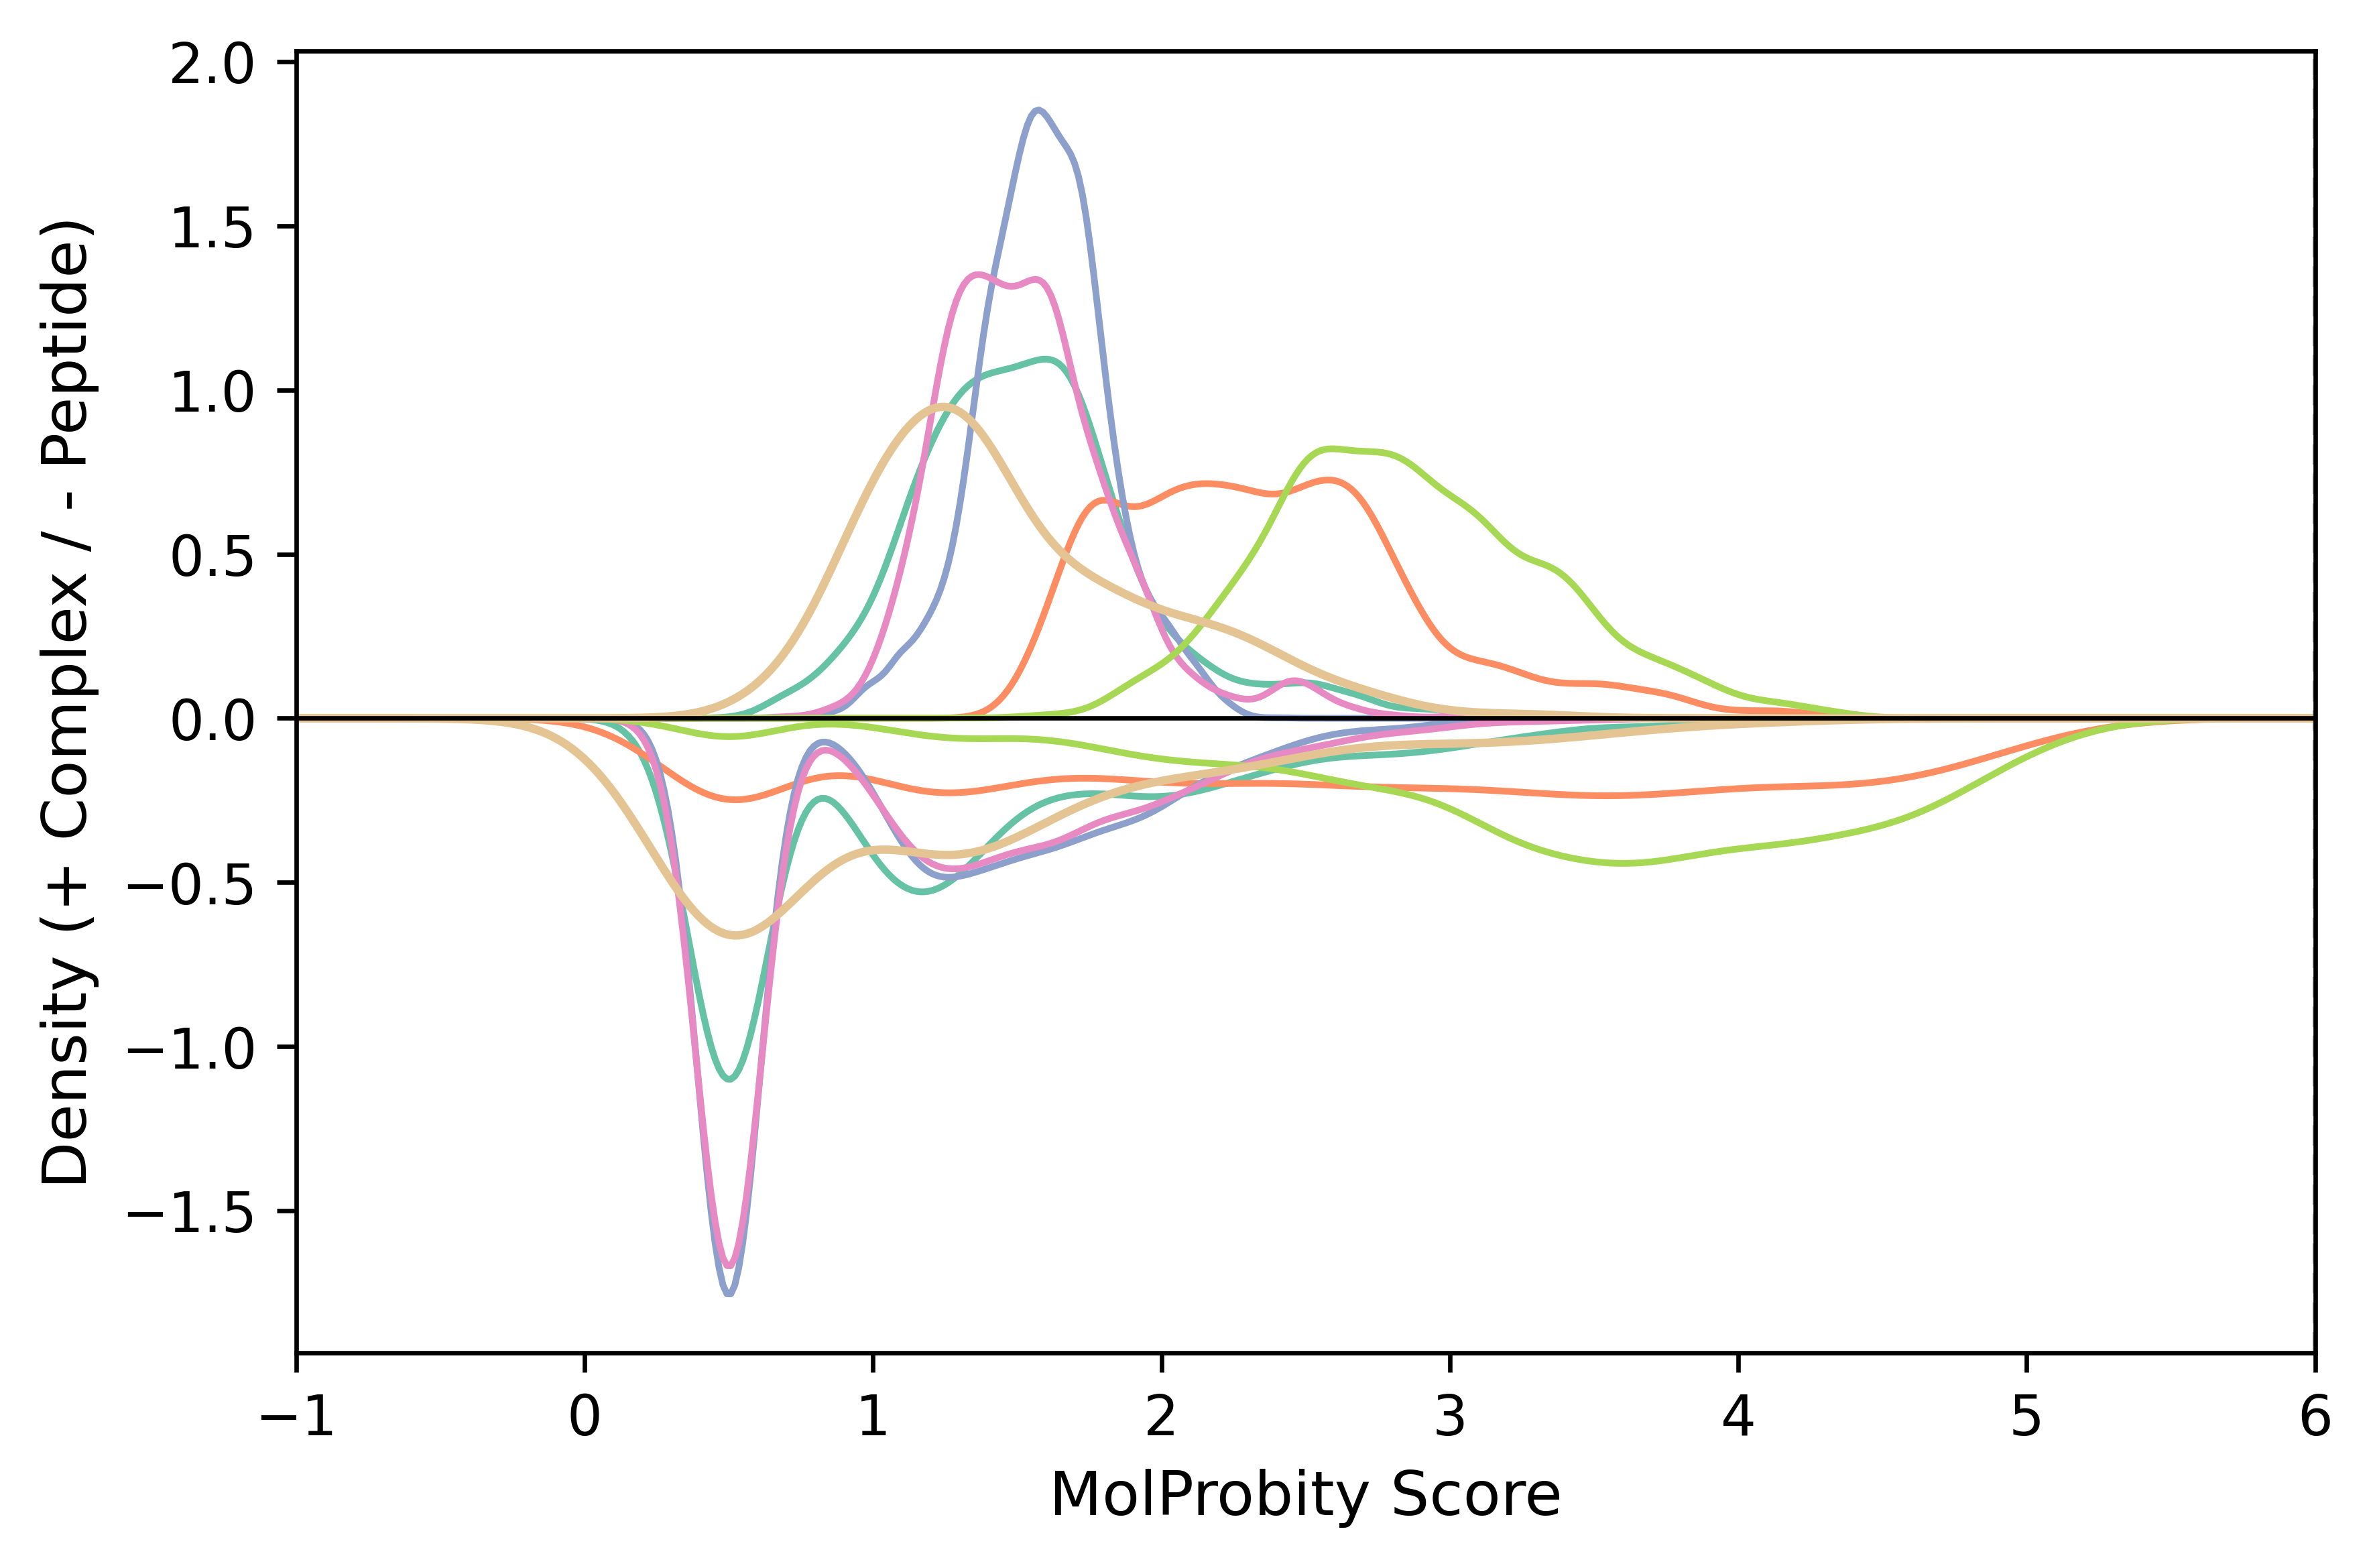

In [6]:
plot_dual_clashscore_distributions(
    df_dict=df_dict,
    df_native=df_native,
    clashscore_cutoff=6,
    left_cutoff=-1,
    score_name="MolProbity score",
    model_list=model_list,
    show_mean=True,
    show_legend=False
)